# Week6

## Image Recovery (Part 1/2)

Exciting topic, continuation of Image Enhancement. In recovery information is lost, a model of the process that results in information loss is established, then an objective criterion is determined. Recovery comes with different names and techniques. 

A first example is the Defocussing, when a blurred image is acquired. ...Or the restoration made on Hubble image Restoration, Cross-Channel Degradation (3D degradation) for which a 3D Deconvolution is needed. When Degradation is 2D we can still choose to do a 3D Deconvolution Restoration. Other techniques are Blind Spatially Varying Restoration, Blocking Artifact Removal [local removal of blocks based on lost information produced by compression], Video Blocking Artifact Removal (using temporal information), Error Concealment (where macro-blocks disappear due to package loss, solved by using temporal information), Inpainting, Image Super-Resolution (using many low resolution images), Compressed Video Super-Resolution, DualExposure Restoration (work on Long and short exposure), Pansharpening (With Spectral decimator and Spatial decimator), Demosaicking (with CFA: Bayer, in which RGB have 50%, 25%, 25% respectively), Tracking Blurred Objects.

Some examples of Sources of Degradation:
Motion, Atmopheric Turbolence, Out-of-Focus Lens, Limitations of acquisition systems, Finite Resolution of sensors, Quantization Errors, Transmission Errors, Noise.

Forms of Recovery Problems: Noise Smoothing, Restoration/Deconvolution (1D/2D/3D), Removal of Compression Artifacts, Super-Resolution, Inpainting and Concealment, Dual Exposure Imaging, Reconstruction from Projections, Compressive Sensing, Light-field Reconstruction. Some of this problems are combined.

The Applications are Space Exploration, Remote Sensing, Surveillance, Medicine, Neuro-imaging, Non-destructive testing, digital photography, printing, microscopy, cellular imaging, multimedia communications...

### Image Restoration

Classical restoration problem. The degradation can be easily removed with LSI in case of linear dgradations.
Recovery problems are all Inverseems: 

$$
f \rightarrow H \rightarrow g
$$

$H$ and $g$ are known. $f$ is not known: recovery - inverse problem. $g$ known: blind recovery. $g$ and $H$ partially known: Semi-Blind recovery problem. $f$ and $g$ known: System identification. $f$ and $H$ known: System Implementation. 


A degradation system can be like:

$$
f\rightarrow H \rightarrow + noise \rightarrow y \rightarrow R \rightarrow \hat{f}
$$

R is function of noise statistics of noise measurements and blur identification. Therefore Prior knowledge $(H,f,n)$ is of utmost importance. Restoration, Noise Estimation, Blur Identification can be computed separately or altogether simultaneously.

In general the Restoration problem is:

$$
y(i,j)=H[f(i,j)]+ n(i,j)
$$

where $y$ is the noisy-blurred observed image. In many application we can use LSI system with noise as additive and signal independent process:

$$
y(i,j)=\sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m,n) h(i-m,j-n)+n(i,j) = f(i,j)**h(i,j)+ n(i,j)
$$

We solve for $f$, therefore this is a Deconvolution problem. Some of most common examples when Degradation has been introduced by an LSI system.

1D motion:

$$
h (i) =   \begin{cases}
    \frac{1}{L+1}       & \quad \text{for } -\frac{L}{2}\leq i \leq \frac{L}{2} \\
    0  & \quad \text{ otherwise}\\
  \end{cases}
$$

Atmospheric turbolence:

$$
h (i,j) =   K e^{-\frac{i^2+j^2}{2\sigma^2}}
$$

Out of Focus:

$$
h (i,j) =   \begin{cases}
    \frac{1}{\pi R}       & \quad \text{for } \sqrt{i^2+j^2} \leq R \\
    0  & \quad \text{ otherwise}\\
  \end{cases}
$$

Pill-box:

$$
h (i,j) =   \begin{cases}
    \frac{1}{(L+1)^2}       & \quad \text{for } -\frac{L}{2}\leq i,j \leq \frac{L}{2} \\
    0  & \quad \text{ otherwise}\\
  \end{cases}
$$

Generally, we use BSNR instead of SNR, where B stnds for Blurred.

$$
BSNR =   10 log_{10}  \frac{ \frac{1}{MN} \sum_i \sum_j \left[ g(i,j)-\bar{g} (i,j) \right]^2 }{ \sigma_n^2 } 
$$

where $g=f**h$ so $g=y-n$, $\bar{g}=E\{g\}$, $\sigma_n^2$ is the noise variance. Consequently the Improvement S-to-N Ratio:

$$
ISNR =   10 log_{10}  \frac{ \sum_i \sum_j \left[ f(i,j)-y (i,j) \right]^2 }{ \sum_i \sum_j \left[ f(i,j)-\bar{f} (i,j) \right]^2  } 
$$




### Vector-Matrix notation


[[ 99  99 100 ...,  97  97  97]
 [ 99  99 100 ...,  97  97  97]
 [ 99  99 100 ...,  97  97  97]
 ..., 
 [126 124 128 ..., 124 123 123]
 [123 122 126 ..., 125 125 124]
 [124 123 124 ..., 126 126 126]]
NxM = (225, 236)


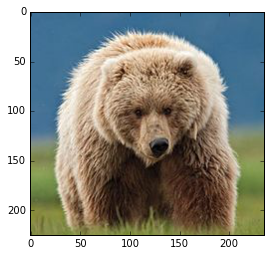

In [28]:
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal, misc, ndimage
import numpy as np
import matplotlib.pyplot as plt
import os

I = misc.imread(os.path.join('media','bear.png') );
Ig = misc.imread(os.path.join('media','bear.png') , mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)
H = np.abs(np.fft.fft2(Ig))
Hnorm = 10*np.log10(H)
Hshift = np.fft.fftshift( Hnorm )
norm = mpl.colors.Normalize(vmin=10, vmax=np.max(Hnorm))

fig=plt.figure(figsize=(15, 4))
ax=plt.subplot(1, 3, 1)
plt.imshow(I,cmap='gray')

print Ig
print 'NxM = ' + str(Ig.shape)


This is how an image $x(n_1,n_2)$ looks like, with pixels from $0$ to $M-1$ and  from $0$ to $N-1$. However, we can stack the image rows into a 1D vector (lexicographic ordering):

In [29]:
Ig_stacked = np.asarray(Ig).reshape(-1)

print Ig_stacked
print '1xNM = ' + str(Ig_stacked.shape)


[ 99  99 100 ..., 126 126 126]
1xNM = (53100,)


Let's assume $y(n)=x(n)**h(n)=\sum_k x(k)h(n-k)$. If we need $y$ with size $(N+L-2)$x$1$, we'll have $H$ of size $(N+L-1)$x$N$, and $x$ with size $N$x$1$. $H$ is called Toeplitz. 

I want to write the circular convolution so that the result is equal to the linear convolution. $y=Hx$, with $H$ that has a spatial structure. In this case $H$ is called circulant Matrix, which is like:

$$
\begin{bmatrix}
       a_1 & a_2 & a_3  \\[0.3em]
       a_3 & a_1 & a_2  \\[0.3em]
       a_2 & a_3 & a_1           
     \end{bmatrix}
$$

where the rows are generated by circular shift. Now, calculating  the eigen-vector and eigen-value is easy. $H_{wn}=\lambda_n w_n$, with 

$$
w_n=[1,  e^{j\frac{2\pi}{M}n},  e^{j\frac{2\pi}{M}2n},  ...,  e^{j\frac{2\pi}{M}(M-1)n}]^T
$$

and

$$
\{ \lambda_0,...,\lambda_{M-1} \}=M \cdot DFT\{ h(0),...,h(M-1) \} \}
$$

so that:

$$
H=WDW^{-1}
$$

and:

$$
W^{-1}y=DW^{-1}x
$$

with $DFT(y) = W^{-1}y$ and $DFT(x) = DW^{-1}x$. So, we have:

$$
y=Hf+n
$$

by stacking the image into the vector notation. If the system is also invariant, we know that:

$$
y(i,j)=\sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f(m,n) h(i-m,j-n)+n(i,j) = f(i,j)**h(i,j)+ n(i,j)
$$

In this case $H$ is a block circulant matrix:

$$
H=\begin{bmatrix}
       H_1 & H_2 & H_3  \\[0.3em]
       H_3 & H_1 & H_2  \\[0.3em]
       H_2 & H_3 & H_1           
     \end{bmatrix}
$$

And each block $H_i$ is also a circulant matrix. And, if I substitute the main expression:

$$
Y=DFT(F)+N \rightarrow Y(u,v)=H(u,v)F(u,v)+N(u,v)
$$

with $u,v=0,1,...,M-1$.

Some algebra elements here: given $x$ a vector, 

$$
|x|^2=x^Tx=\sum_i x_i^2
$$

and

$$
|y-Hx|^2=(y-Hx)^T(y-Hx)=y^Ty Hx- 2 x^T H^T y + x^T H^T H x
$$

and

$$
\nabla_x |x|^2=\begin{bmatrix}
       \frac{\partial}{\partial x_1} |x|^2  \\[0.3em]
       ...  \\[0.3em]
       ...  \\[0.3em]
\frac{\partial}{\partial x_N} |x|^2
     \end{bmatrix} = 
\begin{bmatrix}
       \frac{\partial}{\partial x_1} \sum_i x_i^2  \\[0.3em]
       ...  \\[0.3em]
       ...  \\[0.3em]
       \frac{\partial}{\partial x_N} \sum_i x_i^2 
\end{bmatrix} = 
\begin{bmatrix}
       2x_1  \\[0.3em]
       ...  \\[0.3em]
       ...  \\[0.3em]
       2x_N 
\end{bmatrix} =
2x
$$

and

$$
\nabla_x(x^T y)=y
$$

and

$$
\nabla_x(x^T H^T Hx)=2H^T H x
$$



### Inverse Filtering (Least Square - LS)

Traditionally derived for LSI, therefore can be used for the discrete frequency domain. We will present it as a generalized solution to LS problem. Main drawback is that it amplifies the noise in the image. Degradation equation is still:

$$
y=Hf+n
$$

with $H$ being the known degradation. The simplest approach is to generalize:

$$
J(f)=|y-Hf|^2_2
$$

We will have then to minimize that cost function $J(f)$:

$$
\nabla_f J(f) = \frac{\partial J(f)}{\partial f} =  - 2 H^T y + 2 H^T H f = 0
$$

and, being:

$$
H^THf=H^T y \rightarrow f=(H^TH)^+ Hy
$$


with "+" representing the Generalized Inverse. If $H$ is invertible that's the regular inverse. The solution is general. If the Degradation is LSI, then $H$ is a Block Circulant matrix and we can take the solution to the discrete frequency domain.

$$
F(u,v) =   \begin{cases}
    \frac{H^*(u,v) Y(u,v)}{|H(u,v)|^2}       & \quad \text{for } |H(u,v)|\neq 0 \\
    0  & \quad \text{for } |H(u,v)| = 0\\
  \end{cases}
$$

By the way, it can be easily proven that:

$$
\frac{H^*(u,v) Y(u,v)}{|H(u,v)|^2}  = f+ \frac{N(u,v)}{H(u,v)}
$$

We can use both expressions of $F(u,v)$ by defining a threshold $T$ to control noise amplification.

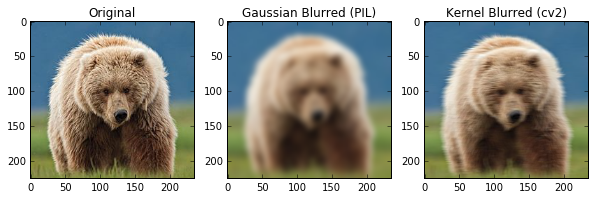

In [30]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal, misc, ndimage
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
from PIL import ImageFilter
import cv2

size = 8

I = misc.imread(os.path.join('media','bear.png') );
Ig = misc.imread(os.path.join('media','bear.png') , mode='L')
Ig1 = PIL.Image.open(os.path.join('media','bear.png'))
Ig_b = Ig1.filter(ImageFilter.GaussianBlur(radius=4))

# generating the kernel
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

# applying the kernel to the input image
Ig_b1 = cv2.filter2D(I, -1, kernel_motion_blur)

x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)
H = np.abs(np.fft.fft2(Ig))
Hnorm = 10*np.log10(H)
Hshift = np.fft.fftshift( Hnorm )
norm = mpl.colors.Normalize(vmin=10, vmax=np.max(Hnorm))

fig=plt.figure(figsize=(10, 3))
ax1=plt.subplot(1, 3, 1)
plt.imshow(I,cmap='gray')
plt.title('Original')

ax2=plt.subplot(1, 3, 2)
plt.imshow(Ig_b,cmap='gray')
plt.title('Gaussian Blurred (PIL)')

ax2=plt.subplot(1, 3, 3)
plt.imshow(Ig_b1,cmap='gray')
plt.title('Kernel Blurred (cv2)')


Let's see the impulse and frequency response of the degradation system $H$, normalized. So in each dimension will be $h(n_1,n_2)=h(n_1)\cdot \delta(n_2)$. The FFT of this signal is the $sinc$ function:

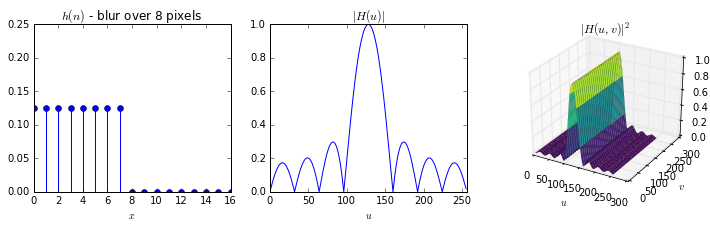

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


fig=plt.figure(figsize=(12, 3))
num_steps = 256
x = np.linspace(0, 255, 256)
y = x
[X, Y] = np.meshgrid(x,y)
# motion over eight pixels means the following:
h = [1./8] *8 + [0] *(256-8)
H=np.fft.fft(h)
Hs = np.fft.fftshift(H)
Hs_norm = (10*np.log(np.abs(Hs)+1))/np.max(10*np.log(np.abs(Hs)+1))
ax=plt.subplot(1, 3, 1)
markerline, stemlines, baseline = plt.stem(x,h , '-')
plt.setp(stemlines, 'color', 'b')
plt.setp(baseline, 'color', 'k')
plt.setp(ax.get_xticklabels(), visible=True)
plt.setp(ax.get_yticklabels(), visible=True)
plt.title('$h(n)$ - blur over 8 pixels')
plt.ylim([0,1./4])
plt.xlim([0,16])
plt.xlabel('$x$');
ax1=plt.subplot(1, 3, 2)
plt.plot(x, Hs_norm, 'b-')
plt.setp(ax.get_xticklabels(), visible=True)
plt.setp(ax.get_yticklabels(), visible=True)
plt.title('$|H(u)|$')
plt.xlim([0,256])
plt.xlabel('$u$');
ax2 = fig.add_subplot(133, projection='3d')
ax2.plot_surface(X,Y,np.power(Hs_norm,2), vmin=0, vmax=1, cmap='viridis', linewidth=0.1)
plt.title('$|H(u,v)|^2$')
plt.xlabel('$u$'); plt.ylabel('$v$')


So, $H(u,v)$ that's the one I want to invert in the frequency domain, and that will give me the Inverse filter. Through the introduction of the Threshold, we are able to control the noise.

### Constrained Least-Squares Filter

The CLS is the most used probably. It turns an unconstrained to a constrained problem, and it restricts the solution by having a prior knowledge, which is challenging to assess. This weight is the Regularization parameters or Lagrangian Multiplier. So, we minimize as:

$$
J(f)=|y-Hf|^2_2
$$

This represent fidelity to the data and it is subject to:

$$
|Cf|^2_2 < \epsilon
$$

which represent instead the prior knowledge. $C$ is a high-pass filter operator. That energy must be less than $\epsilon$, imposing a smoothness to the solution. So we can rewrite it all as:

$$
\min_f (|y-Hf|^2+\alpha |Cf|^2 ) \rightarrow f=(H^TH+\alpha C^TC)^+ H^T y
$$

with $\alpha$ being the Regularization parameters or Lagrangian Multiplier. In the expression, $\alpha C^TC$ might help to make $H^TH$ invertible. If both $H$ and $C$ are circulant, we have:

$$
F(u,v) = \frac{H^*(u,v) Y(u,v)}{|H(u,v)|^2 + \alpha |C(u,v)|^2}{H(u,v)}
$$

If $\alpha=0$, CLS=LS. High $\alpha$ gives a smoother solution. If $\epsilon$ is given, we can choose the right $\alpha$.  
 

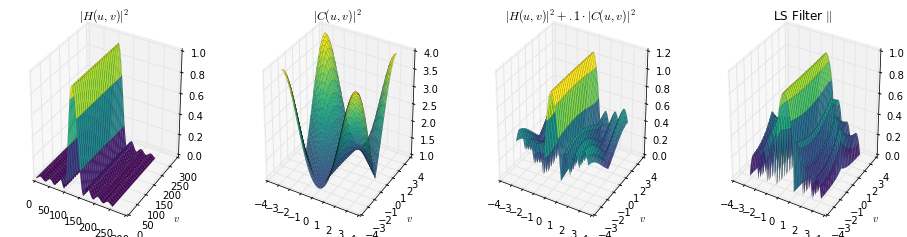

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal, misc, ndimage

num_steps = 256
x = np.linspace(0, 255, 256)
y = x
[X, Y] = np.meshgrid(x,y)
# motion over eight pixels means the following:
h = [1./8] *8 + [0] *(256-8)
H=np.fft.fft(h)
Hs = np.fft.fftshift(H)
Hs_norm = (10*np.log(np.abs(Hs)+1))/np.max(10*np.log(np.abs(Hs)+1))
LP = ndimage.filters.laplace(Hs_norm)

# highpass filter. Magnitude of Laplacian, manually made approximately, cannot say if equal to lecture example...
omega1 = np.linspace(-np.pi, np.pi, 256)
omega2 = np.linspace(-np.pi, np.pi, 256)
[Omega1, Omega2] = np.meshgrid(omega1, omega2)
# C(u,v)
C = np.array(np.abs((np.sin(Omega1*.5))*(np.cos(Omega1*.5+Omega2*.5))))+1
C_norm = np.power(C,2)

alpha = .1
DEN = Hs_norm+alpha*C_norm
NUM = np.conj(Hs)

LSfilter = np.abs(NUM/DEN)

fig=plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(141, projection='3d')
ax1.plot_surface(X,Y,np.power(Hs_norm,2), vmin=0, vmax=1, cmap='viridis', linewidth=0.1)
plt.title('$|H(u,v)|^2$')
plt.xlabel('$u$'); plt.ylabel('$v$')
ax2 = fig.add_subplot(142, projection='3d')
ax2.plot_surface(Omega1,Omega2,C_norm, vmin=0, vmax=4, cmap='viridis', linewidth=0.1)
plt.title('$|C(u,v)|^2$')
plt.xlabel('$u$'); plt.ylabel('$v$')
ax3 = fig.add_subplot(143, projection='3d')
ax3.plot_surface(Omega1,Omega2,DEN, vmin=0, vmax=1, cmap='viridis', linewidth=0.1)
plt.title('$|H(u,v)|^2+.1\cdot|C(u,v)|^2$')
plt.xlabel('$u$'); plt.ylabel('$v$')
# it should be null in 0..
ax4 = fig.add_subplot(144, projection='3d')
ax4.plot_surface(Omega1,Omega2,LSfilter, vmin=0, vmax=1, cmap='viridis', linewidth=0.1)
plt.title('LS Filter $\| \frac{H^*(u,v)}{|H(u,v)|^2+.1\cdot|C(u,v)|^2} \|$')
plt.xlabel('$u$'); plt.ylabel('$v$')

We see the effect of Regularization here:

$$
E|f(\alpha)-f|^2=Bias(f(\alpha))+Var(f(\alpha))
$$

The BIAS term increases as a function of $\alpha$. The VAR term increases as a function of $\alpha$. So we find the mean $E$ and look for the minimum on a $\log-\log_\alpha$ graph. The choice of $\alpha$ is of utmost importance. 

If the noise Variance is known, then:

$$
\min|Cx|^2 \rightarrow |y-Hf|=\epsilon^2
$$

And we choose $\alpha$ so that: |y-Hf|^2~\epsilon^2 and run an iterative loop. 

The visual inspection is also a good one to assess $\alpha$ (noise Variance is not known).

The L=curve is another method to assess $\alpha$, by writing the log(Stabilizing Term) and the log (Smoothing term) in the axes noise Variance is not known.

Third approach without variance known, it's the Generalized cross-validation.

Extensions here:
$$
\min_f (|y-Hf|^2+\alpha |Cf|^2 )
$$

Non-quadratic Regularization:
$$
\min_f (J_1(f,y)+\alpha J_2(f) )
$$

Maximum Entropy Regularization..., Total Variation Regularization..., $l_p$ norm for non-quadratic regularizations..


### Set-Theoretic Restoration Approaches

A set represents a collection of signals that have a certain characteristic/property. In image restoration, we can say that a set $f$ has for instance a certain Smoothness:

$$
Q_f=\{ f | |Cf|^2 \leq \epsilon^2 \}
$$

If the set is convex it is easier to threat. The fidelity to data constraints is

$$
Q_{f|y}=\{ f | |y-Hf|^2 \leq E^2 \}
$$

We want to find an image that has both this properties, in the intersection of these two convex set. How do we obtain a solution? 
One approach is to bound the solution with another ellipsoid and choose the center of this ellipsoid as the solution. This approach will result in a CLS. 

This way of going is called POCS (Projection Onto Convex Sets) approach. Sets are $C_1$, $C_2$. Solution is $C_0$. The initial condition is $f_0$, which has the two projections on the two sets: $P_1f_0$ and $f_1=P_2P_1f_0$. Then I keep on repeating this process and, if I have $m$ convex sets, and $f_k$ updates, then the solution $f^*$ is going to be in the intersection. Thi methos can either easily or hardly find a solution.

For Restoration project, we know what the two sets should be. It can be shown that in the first approach the solution for the center of ellipsoid is exactly CLS, with $\alpha=(\epsilon/E)^2$. In the second approach (POCS), we have the parameters $\lambda_1$ and $\lambda_2$, that should be taken properly in the iteration


### Iterative Restoration Algorithms

We talk about Iterative Restoration Algorithms, also with constraints... and find how to get a solution. Iterative Algorithms have many advantages, as the use in blind restoration, control of noise in each iteration, use number of iterations as a means of regularization, monitoring the restoration process, avoid implementation of the inverse of an operator. 

In general, we should find the roots of $\Phi(f)$ with iterations.

$$
f_0 =0
$$

and

$$
f_{k+1}=f_k+\beta \Phi(f_k) = \Psi(f_k)
$$

We can also add Constraints or Projection operators during successive Approximations. An example of this is the "positive constraints".
We'll use the common $y=Hf+n$ now.

$$
\Phi(f)=y-Hf
$$

and

$$
f_{k+1}=f_k+\beta(y-Hf_k)=\beta y+ (I-\beta H)f_k
$$

If the system is LSI, $H$ is block circulant matrix, and we can find the frequency domain:

$$
F_{k+1}(u,v)=\beta Y(u,v)+ (1-\beta H(u,v))F_k(u,v)
$$

Let's rewrite it with restoration filter $R$:

$$
F_k(u,v)=R_k(u,v)Y(u,v)
$$

and we will have in general that:

$$
R_k(u,v)=\beta\sum_{i=0}^{k-1}(1-\beta H(u,v))^i
$$

From that to Converge we see that the magnitude of that term inside the sum should be less than 1. $H$ should be inside a circle with radius $1/\beta$. The Restoration takes place for Each Frequency! Low Frequencies: Faster convergence. High Frequencies: Slower convergence.

### Application to the LS and CLS filters

It's a gadient descent with a fixed step. The choice of Regulation parameter goes to the background a bit because we can assess the Restoration filter via the number of iterations. If we use:

$$
\Phi(f)=\frac{1}{2} \nabla_f |y-Hf|^2
$$

then:

$$
f_{k+1}=f_k+\beta H^T (y-Hf_k)=\beta H^T y+ (I-\beta H^T H)f_k
$$

And if the system is LSI:

$$
F_{k+1}(u,v)=\beta H^*(u,v) Y(u,v)+ (1-\beta |H(u,v)|^2)F_k(u,v)
$$

and:

$$
R_k(u,v)=\beta\sum_{i=0}^{k-1}(1-\beta |H(u,v)|^2)^i H^*(u,v)
$$

and at this point we can study the convergency of it. We can also look for the Residual Error, and declare convergence at our defined threshold. For CLS, therefore by adding the smoothness constraint, we have:

$$
\Phi(f)=\frac{1}{2} \nabla_f (|y-Hf|^2 +\alpha |Cf|^2)
$$

then:

$$
f_{k+1}=\beta H^T y+ (I-\beta (H^T H+\alpha C^T C))f_k
$$

And if the system is LSI:

$$
F_{k+1}(u,v)=\beta H^*(u,v) Y(u,v)+ (1-\beta (|H(u,v)|^2 + \alpha |C(u,v)|^2))F_k(u,v)
$$

and:

$$
R_k(u,v)=\beta\sum_{i=0}^{k-1}(1-\beta (|H(u,v)|^2+\alpha |C(u,v)|^2)^i H^*(u,v)
$$



### Spatial Adaptive Algorithms

That's the case the Filter knows who the local spatial context looks like. Direct Solution are not feasible anymore. Conceptially, we can get the properties of an image from the partially restored images. One of the way to introdue Spatially Adaptive CLS Filters is:

$$
\Phi(f)=\frac{1}{2} \nabla_f (|y-Hf|_{W_1}^2 + \alpha |Cf|_{W_2}^2)
$$

where $W$ is the weight. Weight matrixes are not block circulant, so, convolution is used. Weight can be chosen by setting the weight to the $V$ function of $1/\sigma_f^2$ visibility matrix. It will do the convolution just for areas near the edges, and smooth out in the flat regions.

The solution depends strongly on these two weights. We have see Ringing Artifacts. If we look a the images



### Final example (from the exercises)


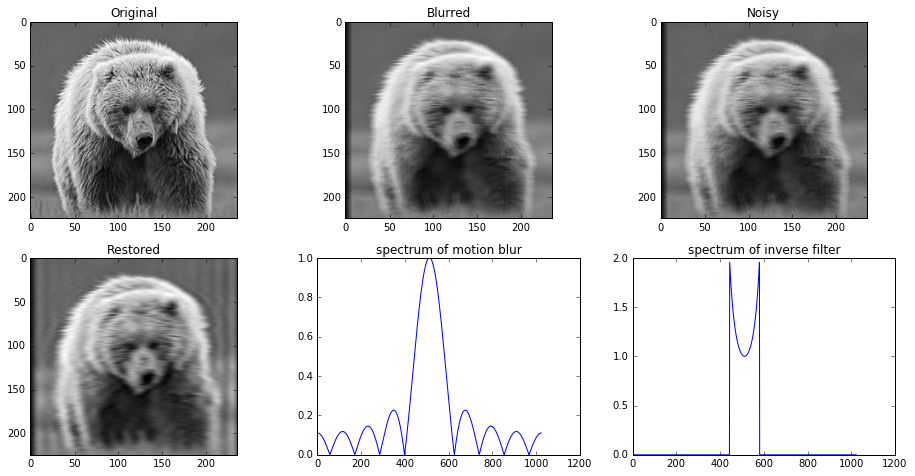

In [33]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal, misc, ndimage
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
from PIL import ImageFilter
import skimage
import cv2

T = .5; # Threshold

I = misc.imread(os.path.join('media','bear.png') );
# read in the original, sharp and noise-free image
original = misc.imread(os.path.join('media','bear.png') , mode='L').astype(float)/255
H = np.size(original,0)
W = np.size(original,1)

# generate the blurred and noise-corrupted image for experiment
motion_kernel = np.ones((1, 9)) / 9.  # 1-D motion blur
motion_freq = np.fft.fft2(motion_kernel, s=(1024, 1024))  # frequency response of motion blur
original_freq = np.fft.fft2(original, s=(1024, 1024))
blurred_freq = np.multiply(original_freq, motion_freq)  # spectrum of blurred image
blurred = np.abs(np.fft.ifft2(blurred_freq)) 
blurred = blurred[0 : H, 0 : W]
blurred[blurred < 0] = 0.
blurred[blurred > 1] = 1.
noisy = skimage.util.random_noise(blurred, mode='gaussian', clip=True, mean=0., var=1e-4); # np.real(blurred) to check!!...

# Restoration from blurred and noise-corrupted image
# generate restoration filter in the frequency domain
## ! something goes wrong here..
inverse_freq = np.zeros(motion_freq.shape)
inverse_freq[np.array([np.abs(motion_freq) < T])[0]] = 0.
inverse_freq[np.array([np.abs(motion_freq) >= T])[0]] = 1./ abs(motion_freq[np.array([np.abs(motion_freq) >= T])[0]])
# spectrum of blurred and noisy-corrupted image (the input to restoration)
noisy_freq = np.fft.fft2(noisy, s=(1024,1024))
# restoration
restored_freq = np.multiply(noisy_freq, inverse_freq)
restored = np.fft.ifft2(restored_freq)
restored = restored[0 : H, 0 : W]
restored[np.real(restored) < 0.] = 0.
restored[np.real(restored) > 1.] = 1.

# analysis of result
noisy_psnr = 10. * np.log10(1. / (np.power(np.linalg.norm(original - noisy, 'fro'), 2) / H / W))
restored_psnr = 10. * np.log10(1. / (np.power(np.linalg.norm(original - restored, 'fro'), 2) / H / W))

fig=plt.figure(figsize=(16, 12))
ax1=plt.subplot(3, 3, 1)
plt.imshow(original,cmap='gray')
plt.title('Original')

ax2=plt.subplot(3, 3, 2)
plt.imshow(blurred,cmap='gray')
plt.title('Blurred')

ax3=plt.subplot(3, 3, 3)
plt.imshow(noisy,cmap='gray')
plt.title('Noisy')

ax4=plt.subplot(3, 3, 4)
plt.imshow(np.real(restored),cmap='gray')
plt.title('Restored')

ax5=plt.subplot(3, 3, 5)
plt.plot(np.abs(np.fft.fftshift(motion_freq[0, :])),'b-')
plt.title('spectrum of motion blur')

ax6=plt.subplot(3, 3, 6)
plt.plot(np.abs(np.fft.fftshift(inverse_freq[0, :])),'b-')
plt.title('spectrum of inverse filter')
